In [1]:
# The usual preamble
%matplotlib inline
import polars as pl
import plotlib as sbn
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

Let's continue with our NYC 311 service requests example.

In [2]:
# because of mixed types we specify dtype to prevent any errors
complaints = pl.read_csv('../data/311-service-requests.csv', dtypes={'Incident Zip':pl.Utf8})

# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [3]:
complaints.head()

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26589651,"""10/31/2013 02:…",null,"""NYPD""","""New York City …","""Noise - Street…","""Loud Talking""","""Street/Sidewal…","""11432""","""90-03 169 STRE…","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:…","""10/31/2013 02:…","""12 QUEENS""","""QUEENS""",1042027,197389,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.708275,-73.791604,"""(40.7082753259…"
26593698,"""10/31/2013 02:…",null,"""NYPD""","""New York City …","""Illegal Parkin…","""Commercial Ove…","""Street/Sidewal…","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:…",null,"""05 QUEENS""","""QUEENS""",1009349,201984,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.721041,-73.909453,"""(40.7210405356…"
26594139,"""10/31/2013 02:…","""10/31/2013 02:…","""NYPD""","""New York City …","""Noise - Commer…","""Loud Music/Par…","""Club/Bar/Resta…","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREE…","""WEST 172 STREE…",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:…","""10/31/2013 02:…","""12 MANHATTAN""","""MANHATTAN""",1001088,246531,"""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.84333,-73.939144,"""(40.8433297546…"
26595721,"""10/31/2013 01:…","""10/31/2013 02:…","""NYPD""","""New York City …","""Noise - Vehicl…","""Car/Truck Horn…","""Street/Sidewal…","""10023""","""WEST 72 STREET…","""WEST 72 STREET…","""COLUMBUS AVENU…","""AMSTERDAM AVEN…",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:…","""10/31/2013 02:…","""07 MANHATTAN""","""MANHATTAN""",989730,222727,"""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.778009,-73.980213,"""(40.7780087446…"
26590930,"""10/31/2013 01:…",null,"""DOHMH""","""Department of …","""Rodent""","""Condition Attr…","""Vacant Lot""","""10027""","""WEST 124 STREE…","""WEST 124 STREE…","""LENOX AVENUE""","""ADAM CLAYTON P…",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""N/A""","""Pending""","""11/30/2013 01:…","""10/31/2013 01:…","""1

To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [4]:
noise_complaints = complaints.filter(pl.col('Complaint Type') == "Noise - Street/Sidewalk")
noise_complaints.head(3)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26589651,"""10/31/2013 02:…",null,"""NYPD""","""New York City …","""Noise - Street…","""Loud Talking""","""Street/Sidewal…","""11432""","""90-03 169 STRE…","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:…","""10/31/2013 02:…","""12 QUEENS""","""QUEENS""",1042027,197389,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.708275,-73.791604,"""(40.7082753259…"
26594086,"""10/31/2013 12:…","""10/31/2013 02:…","""NYPD""","""New York City …","""Noise - Street…","""Loud Music/Par…","""Street/Sidewal…","""10310""","""173 CAMPBELL A…","""CAMPBELL AVENU…","""HENDERSON AVEN…","""WINEGAR LANE""",null,null,"""ADDRESS""","""STATEN ISLAND""",null,"""Precinct""","""Closed""","""10/31/2013 08:…","""10/31/2013 02:…","""01 STATEN ISLA…","""STATEN ISLAND""",952013,171076,"""Unspecified""","""STATEN ISLAND""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.636182,-74.11615,"""(40.6361820217…"
26591573,"""10/31/2013 12:…","""10/31/2013 02:…","""NYPD""","""New York City …","""Noise - Street…","""Loud Talking""","""Street/Sidewal…","""10312""","""24 PRINCETON L…","""PRINCETON LANE…","""HAMPTON GREEN""","""DEAD END""",null,null,"""ADDRESS""","""STATEN ISLAND""",null,"""Precinct""","""Closed""","""10/31/2013 08:…","""10/31/2013 01:…","""03 STATEN ISLA…","""STATEN ISLAND""",929577,140964,"""Unspecified""","""STATEN ISLAND""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.553421,-74.196743,"""(40.5534207871…"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [5]:
pl.col('Complaint Type') == "Noise - Street/Sidewalk"

This is a polars expression, which represents a transformation of Series. In this case, this expression represents a mapping from 'Complaint Type' Series (a str) to a boolean Series based on the predecate. The "filter" function will take in any expression which evaluates to a boolean Series.

You can also store and combine more than one expression with the `&` operator like this:

In [6]:
is_noise = pl.col('Complaint Type') == "Noise - Street/Sidewalk"
in_brooklyn = pl.col('Borough') == "BROOKLYN"
complaints.filter(is_noise & in_brooklyn).head()

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26595564,"""10/31/2013 12:…",null,"""NYPD""","""New York City …","""Noise - Street…","""Loud Music/Par…","""Street/Sidewal…","""11236""","""AVENUE J""","""AVENUE J""","""EAST 80 STREET…","""EAST 81 STREET…",null,null,"""BLOCKFACE""","""BROOKLYN""",null,"""Precinct""","""Open""","""10/31/2013 08:…",null,"""18 BROOKLYN""","""BROOKLYN""",1008937,170310,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.634104,-73.911055,"""(40.6341037759…"
26595553,"""10/31/2013 12:…","""10/31/2013 02:…","""NYPD""","""New York City …","""Noise - Street…","""Loud Talking""","""Street/Sidewal…","""11225""","""25 LEFFERTS AV…","""LEFFERTS AVENU…","""WASHINGTON AVE…","""BEDFORD AVENUE…",null,null,"""ADDRESS""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 08:…","""10/31/2013 01:…","""09 BROOKLYN""","""BROOKLYN""",995366,180388,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.661793,-73.959934,"""(40.6617931276…"
26594653,"""10/30/2013 11:…","""10/31/2013 12:…","""NYPD""","""New York City …","""Noise - Street…","""Loud Music/Par…","""Street/Sidewal…","""11222""",null,null,null,null,"""DOBBIN STREET""","""NORMAN STREET""","""INTERSECTION""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 07:…","""10/31/2013 12:…","""01 BROOKLYN""","""BROOKLYN""",996925,203271,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.7246,-73.954271,"""(40.7245995637…"
26591992,"""10/30/2013 10:…","""10/30/2013 10:…","""NYPD""","""New York City …","""Noise - Street…","""Loud Talking""","""Street/Sidewal…","""11218""","""DITMAS AVENUE""","""DITMAS AVENUE""",null,null,null,null,"""LATLONG""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 06:…","""10/30/2013 10:…","""01 BROOKLYN""","""BROOKLYN""",991895,171051,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.636169,-73.972455,"""(40.6361687656…"
26594167,"""10/30/2013 08:…","""10/30/2013 10:…","""NYPD""","""New York City …","""Noise - Street…","""Loud Music/Par…","""Street/Sidewal…","""11218""","""126 BEVERLY RO…","""BEVERLY ROAD""","""CHURCH AVENUE""","""EAST 2 STREET""",null,null,"""ADDRESS""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 04:…","""10/30/2013 1

Or if we just wanted a few columns:

In [7]:
complaints.filter(is_noise & in_brooklyn)[['Complaint Type', 'Borough', 'Created Date', 'Descriptor']].head(10)

Complaint Type,Borough,Created Date,Descriptor
str,str,str,str
"""Noise - Street…","""BROOKLYN""","""10/31/2013 12:…","""Loud Music/Par…"
"""Noise - Street…","""BROOKLYN""","""10/31/2013 12:…","""Loud Talking"""
"""Noise - Street…","""BROOKLYN""","""10/30/2013 11:…","""Loud Music/Par…"
"""Noise - Street…","""BROOKLYN""","""10/30/2013 10:…","""Loud Talking"""
"""Noise - Street…","""BROOKLYN""","""10/30/2013 08:…","""Loud Music/Par…"
"""Noise - Street…","""BROOKLYN""","""10/30/2013 08:…","""Loud Talking"""
"""Noise - Street…","""BROOKLYN""","""10/30/2013 06:…","""Loud Music/Par…"
"""Noise - Street…","""BROOKLYN""","""10/30/2013 03:…","""Loud Talking"""
"""Noise - Street…","""BROOKLYN""","""10/29/2013 10:…","""Loud Talking"""


# 3.2 So, which borough has the most noise complaints?

In [8]:
noise_complaints = complaints.filter(pl.col('Complaint Type') == "Noise - Street/Sidewalk")
noise_complaints['Borough'].value_counts(sort=True)

Borough,counts
str,u32
"""MANHATTAN""",917
"""BROOKLYN""",456
"""BRONX""",292
"""QUEENS""",226
"""STATEN ISLAND""",36
"""Unspecified""",1


It's Manhattan! But Manhattan probably has a lot of complaints in total. Maybe it's better to get the percentage of all complaints that are noise complaints? That would be easy too with the `groupby` method:

In [9]:
complaint_avgs = complaints.groupby("Borough").agg(
        noise_complaint_avg=(pl.col('Complaint Type') == "Noise - Street/Sidewalk").mean()
    ).sort('noise_complaint_avg', descending=True)
complaint_avgs

Borough,noise_complaint_avg
str,f64
"""MANHATTAN""",0.037755
"""BRONX""",0.014833
"""BROOKLYN""",0.013864
"""QUEENS""",0.010143
"""STATEN ISLAND""",0.007474
"""Unspecified""",0.000141


It looks like noise complaints make up about 3.7% of all complaints in Manhattan. Which isn't a lot, but it's still leading amongst all boroughs.

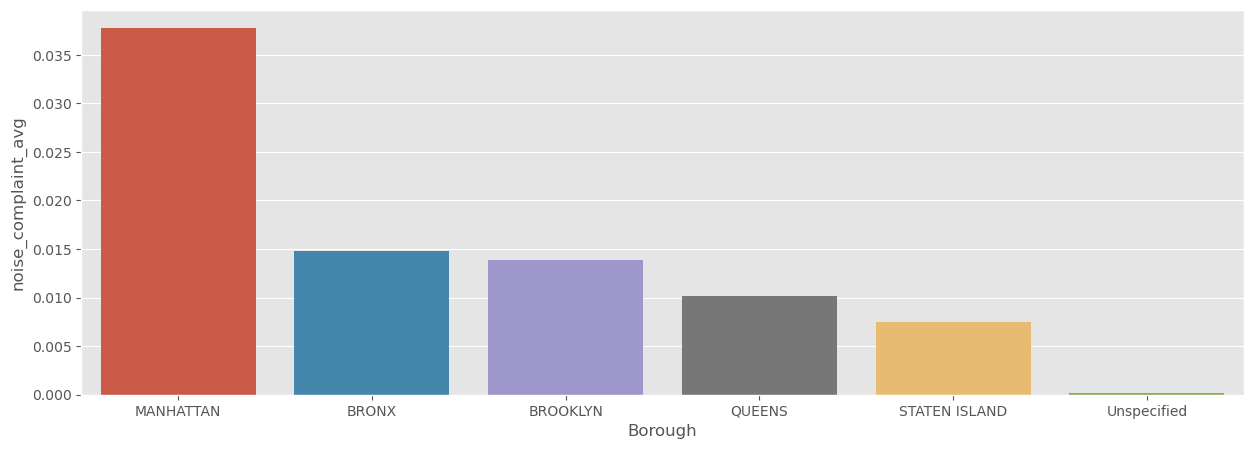

In [10]:
sbn.barplot(complaint_avgs, x='Borough', y='noise_complaint_avg')

So Manhattan really does complain more about noise than the other boroughs! Neat.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  